# TP2 : Prétraitement

### Réalisé par :
- **ABOURA Mohammed Ilyes**
- **OUSLIMANI Hocine**

## Étape : Préparation du TP

In [40]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

### Aperçu de l'image utilisée dans le TP

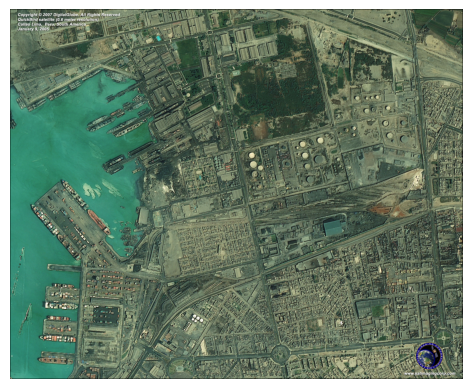

In [41]:
# Chemin vers l'image
imageName = "quickbird-callao-lima-peru.jpg"
image = Image.open(imageName)

# Affichage de l'image
plt.imshow(image)
plt.axis('off')
plt.show()

## Étape 1 : Opération géométrique

### Question 1 : Création d'une fonction pour découper et enregistrer sous le format .png

In [42]:
def cropImage(image, x, y, tx, ty):
    imageNP = np.array(image)
    croppedImageArray = imageNP[y:y + ty, x:x + tx]
    croppedImage = Image.fromarray(croppedImageArray)

    imageName = f"croppedImage_{tx}x{ty}.png"
    croppedImage.save(imageName, "PNG")
    print(f"L'image découpée a été enregistrée sous {imageName}")

    return (croppedImage, imageName)

### Affichage du découpage de l'image

L'image découpée a été enregistrée sous croppedImage_400x400.png


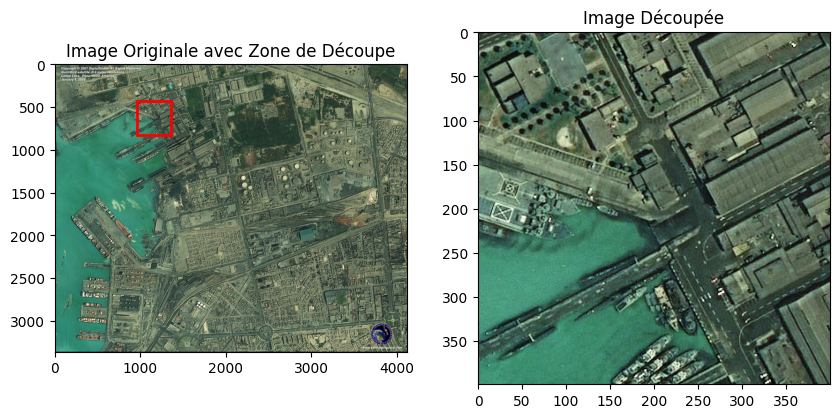

In [43]:
def displayCroppedImage(image, x, y, tx, ty, croppedImage):
    # Convertir l'image en tableau numpy pour affichage
    imageNP = np.array(image)

    # Création de la figure pour l'affichage côte à côte
    plt.figure(figsize=(10, 5))

    # Afficher l'image originale avec un rectangle pour montrer la zone de découpe
    plt.subplot(1, 2, 1)
    plt.imshow(imageNP)
    plt.gca().add_patch(plt.Rectangle((x, y), tx, ty, edgecolor='red', facecolor='none', linewidth=2))
    plt.title("Image Originale avec Zone de Découpe")

    # Afficher l'image découpée
    plt.subplot(1, 2, 2)
    plt.imshow(croppedImage)
    plt.title("Image Découpée")

    plt.show()

croppedImage, croppedImageName = cropImage(image, 960, 430, 400, 400)
displayCroppedImage(image, 960, 430, 400, 400, croppedImage)

## Étape 2 : Compression

### Question 1 : Sauvegarder les images sous différents formats

In [44]:
def saveImageformats(image, filename = "imageFormats"):
    formats = ["bmp", "jpeg", "gif", "tiff"]
    savedImages = {}

    for fmt in formats:
        imageName = f"{filename}.{fmt}"
        image.save(imageName, fmt)
        savedImages[fmt] = imageName
        print(f"Image sauvegardée en {fmt} sous {imageName}")

    return savedImages


savedImages = saveImageformats(croppedImage)

Image sauvegardée en bmp sous imageFormats.bmp
Image sauvegardée en jpeg sous imageFormats.jpeg
Image sauvegardée en gif sous imageFormats.gif
Image sauvegardée en tiff sous imageFormats.tiff


### Question 2 : Ouverture des fichiers enregistrés

Taille de l'image originale : 314.46 KB
Taille de l'image bmp : 468.80 KB
Taille de l'image jpeg : 38.51 KB
Taille de l'image gif : 162.77 KB
Taille de l'image tiff : 468.89 KB


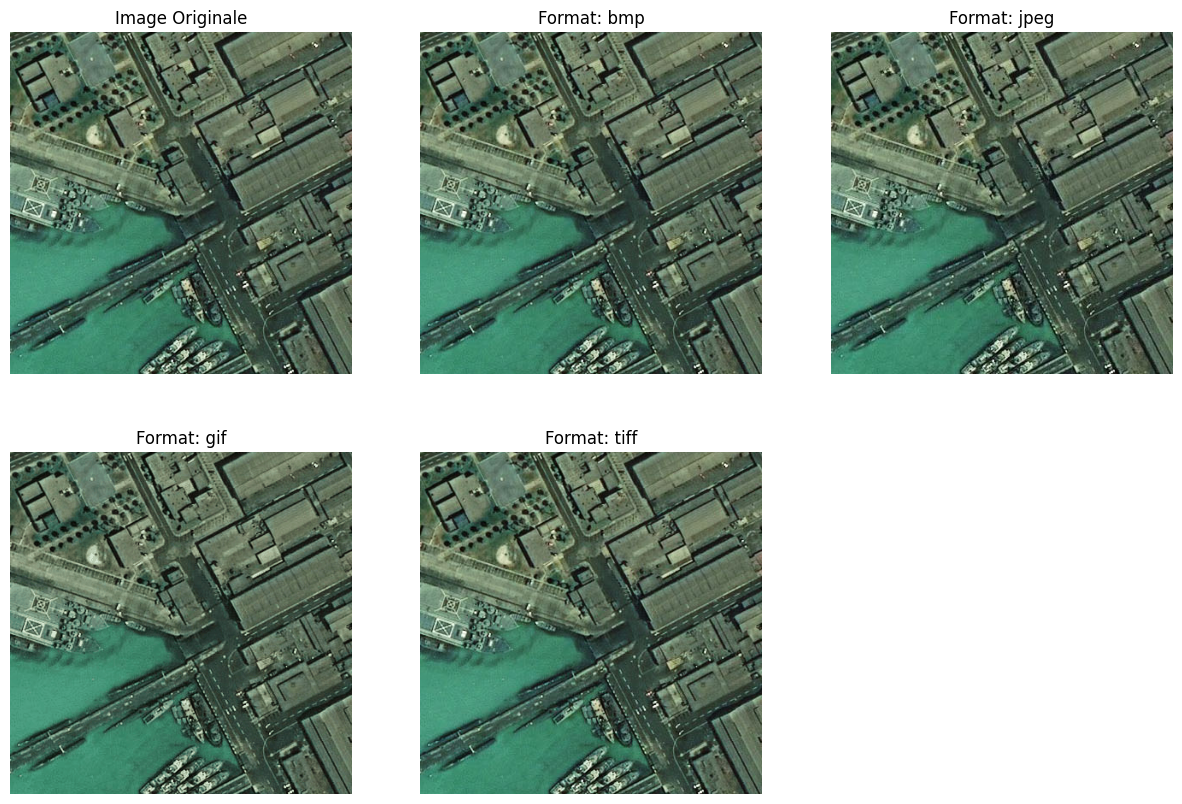

In [45]:
def afficherImages(savedImages, imageOriginalName):
    # Vérifier si le fichier de l'image originale existe
    if not os.path.exists(imageOriginalName):
        print(f"Erreur : le fichier {imageOriginalName} n'existe pas.")
        return
    
    # Afficher l'image originale
    imageOriginal = Image.open(imageOriginalName)
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)
    plt.imshow(imageOriginal)
    plt.title("Image Originale")
    plt.axis('off')

    # Calcul et affichage de la taille des fichiers
    originalSize = os.path.getsize(imageOriginalName)
    print(f"Taille de l'image originale : {originalSize / 1024:.2f} KB")

    # Afficher chaque image sauvegardée et afficher la taille
    for i, (fmt, path) in enumerate(savedImages.items(), start=2):
        if not os.path.exists(path):
            print(f"Erreur : le fichier {path} n'existe pas.")
            continue

        compressedImage = Image.open(path)
        plt.subplot(2, 3, i)
        plt.imshow(compressedImage)
        plt.title(f"Format: {fmt}")
        plt.axis('off')
        
        # Taille du fichier
        compressedSize = os.path.getsize(path)
        print(f"Taille de l'image {fmt} : {compressedSize / 1024:.2f} KB")

    plt.show()


afficherImages(savedImages, croppedImageName)


#### commentaire : 
Les différents formats d’image affichent des tailles variées. Le BMP et le TIFF ont les tailles les plus élevées (environ 469 KB), indiquant qu’ils sont probablement en mode non compressé. L'image JPEG, quant à elle, est beaucoup plus petite (38.51 KB), grâce à une compression efficace. Le GIF a une taille moyenne (162.77 KB), plus grande que le JPEG mais plus petite que le BMP et le TIFF. Ces différences illustrent comment chaque format peut influencer la taille de fichier en fonction de la méthode de compression utilisée.

### Question 3 : Création d'une fonction qui calcule l'erreur quadratique moyenne (EQM)

In [46]:
def calculerEQM(image1, image2):
    # Convertir les deux images en niveaux de gris pour simplifier le calcul
    image1 = image1.convert("L")
    image2 = image2.convert("L")

    # Assurez-vous que les images ont les mêmes dimensions
    if image1.size != image2.size:
        image2 = image2.resize(image1.size)

    # Convertir les images en tableaux NumPy
    arr1 = np.array(image1)
    arr2 = np.array(image2)

    # Dimensions de l'image
    M, N = arr1.shape

    # Calculer l'EQM
    eqm = np.sum((arr1 - arr2) ** 2) / (M * N)
    return eqm




### Application de la fonction EQM sur les différents formats enregistrés

In [47]:
# Exemple d'utilisation avec une boucle pour différents formats
for fmt, name in savedImages.items():
    compressedImage = Image.open(name)
    eqm = calculerEQM(croppedImage, compressedImage)
    print(f"EQM entre l'image originale et l'image en {fmt}: {eqm:.2f}")

EQM entre l'image originale et l'image en bmp: 0.00
EQM entre l'image originale et l'image en jpeg: 19.63
EQM entre l'image originale et l'image en gif: 3.17
EQM entre l'image originale et l'image en tiff: 0.00


#### Commentaire : 
L'application de l'EQM sur les différents formats d'image montre que les formats BMP et TIFF, avec un EQM de 0.00, sont identiques à l'image originale, suggérant une absence de perte de qualité. En revanche, le format JPEG présente un EQM de 19.63, indiquant une compression avec perte qui altère légèrement l'image. Le format GIF, avec un EQM de 3.17, montre une faible différence par rapport à l'original

## Étape 3 : Rehaussement de contraste
### Question 1 : Création d'une fonction qui effectue une égalisation d'histogramme

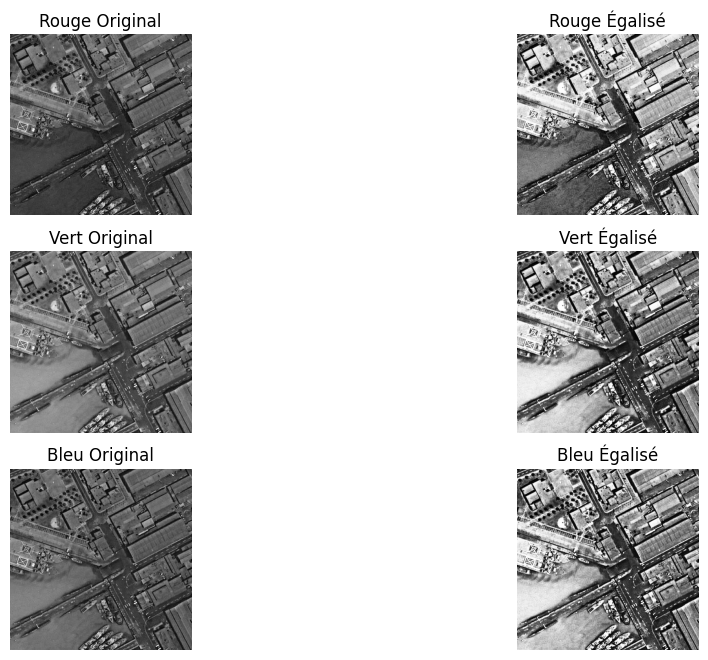

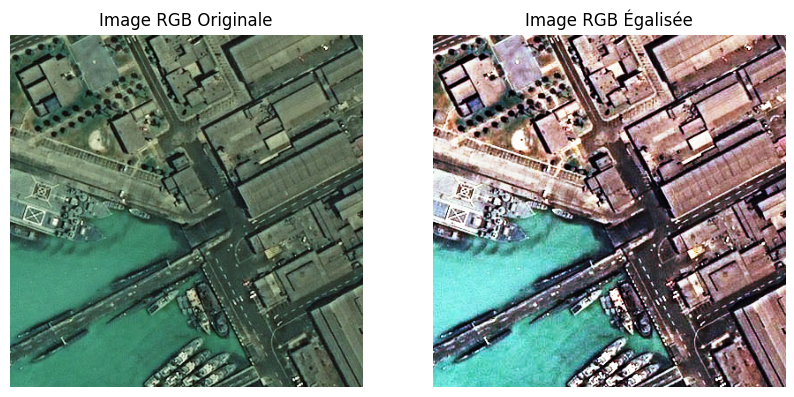

In [48]:
def egalisationHistogrammeCanal(canal):
    L = 256
    n = canal.shape[0] * canal.shape[1]

    # Calcul de l'histogramme et de la transformation d'égalisation
    histogram, _ = np.histogram(canal.flatten(), bins=L, range=[0, L])
    cumsumHistogram = np.cumsum(histogram)
    cumsumHistogramNormalized = (L - 1) * cumsumHistogram / n

    # Appliquer l'égalisation au canal
    egalisedCanal = cumsumHistogramNormalized[canal]
    return egalisedCanal.astype(np.uint8)


def egalisationHistogramme(image):
    imageNP = np.array(image)
    equalizedChannels = []
    originalChannels = []

    # Boucle sur chaque canal (R, G, B)
    for i in range(3):
        canal = imageNP[:, :, i]
        originalChannels.append(canal)  # Stocker les canaux originaux pour comparaison

        # Appliquer l'égalisation en utilisant egalisationHistogrammeCanal
        egalisedCanal = egalisationHistogrammeCanal(canal)
        equalizedChannels.append(egalisedCanal)
    
    # Reconstituer l'image égalisée en fusionnant les canaux
    imageEqualizedArray = np.stack(equalizedChannels, axis=-1)
    imageEqualized = Image.fromarray(imageEqualizedArray)
    imageName = "imageEqualized.png"
    imageEqualized.save(imageName, "png")

    return (imageName, imageEqualized, originalChannels, equalizedChannels)

def afficherComparaison(originalImage, equalizedImage, originalChannels, equalizedChannels):
    plt.figure(figsize=(12, 8))

    # Comparaison des canaux R, G et B (Original et Égalisé)
    channel_names = ['Rouge', 'Vert', 'Bleu']
    for i in range(3):
        # Canal original
        plt.subplot(3, 2, 2*i + 1)
        plt.imshow(originalChannels[i], cmap='gray')
        plt.title(f"{channel_names[i]} Original")
        plt.axis('off')
        
        # Canal égalisé
        plt.subplot(3, 2, 2*i + 2)
        plt.imshow(equalizedChannels[i], cmap='gray')
        plt.title(f"{channel_names[i]} Égalisé")
        plt.axis('off')
    
    # Comparaison des images RGB (Original et Égalisé)
    plt.figure(figsize=(10, 5))

    # Image originale RGB
    plt.subplot(1, 2, 1)
    plt.imshow(originalImage)
    plt.title("Image RGB Originale")
    plt.axis('off')

    # Image égalisée RGB
    plt.subplot(1, 2, 2)
    plt.imshow(equalizedImage)
    plt.title("Image RGB Égalisée")
    plt.axis('off')

    plt.show()

# Exemple d'utilisation
imageEqualizedName, imageEqualized, originalChannels, equalizedChannels = egalisationHistogramme(croppedImage)
afficherComparaison(croppedImage, imageEqualized, originalChannels, equalizedChannels)


#### commentaire :
Les résultats de l'égalisation d'histogramme montrent une amélioration notable du contraste pour chaque canal (rouge, vert, bleu) individuellement. Dans les images égalisées, les détails deviennent plus visibles, particulièrement dans les zones sombres et claires. Cela se traduit par une distribution plus uniforme des niveaux de gris pour chaque canal, ce qui permet de faire ressortir davantage de détails.

### Question 2 : Calcul du EQM entre l'image originale et l'image généralisée

In [49]:
eqm = calculerEQM(imageEqualized, croppedImage)
print(f"EQM entre l'image originale et l'image égaliser: {eqm:.2f}")

EQM entre l'image originale et l'image égaliser: 109.41


### Question 3 : Peut-on généraliser l'égalisation d'histogramme au cas d'une image généralisée ?

it can also be used on color images by applying the same method separately to the Red, Green and Blue components of the RGB color values of the image. However, applying the same method on the Red, Green, and Blue components of an RGB image may yield dramatic changes in the image's color balance since the relative distributions of the color channels change as a result of applying the algorithm.
However, if the image is first converted to another color space, Lab color space, or HSL/HSV color space in particular, then the algorithm can be applied to the luminance or value channel without resulting in changes to the hue and saturation of the image.

source : [Histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization)

### Implméntation de la méthode HSV

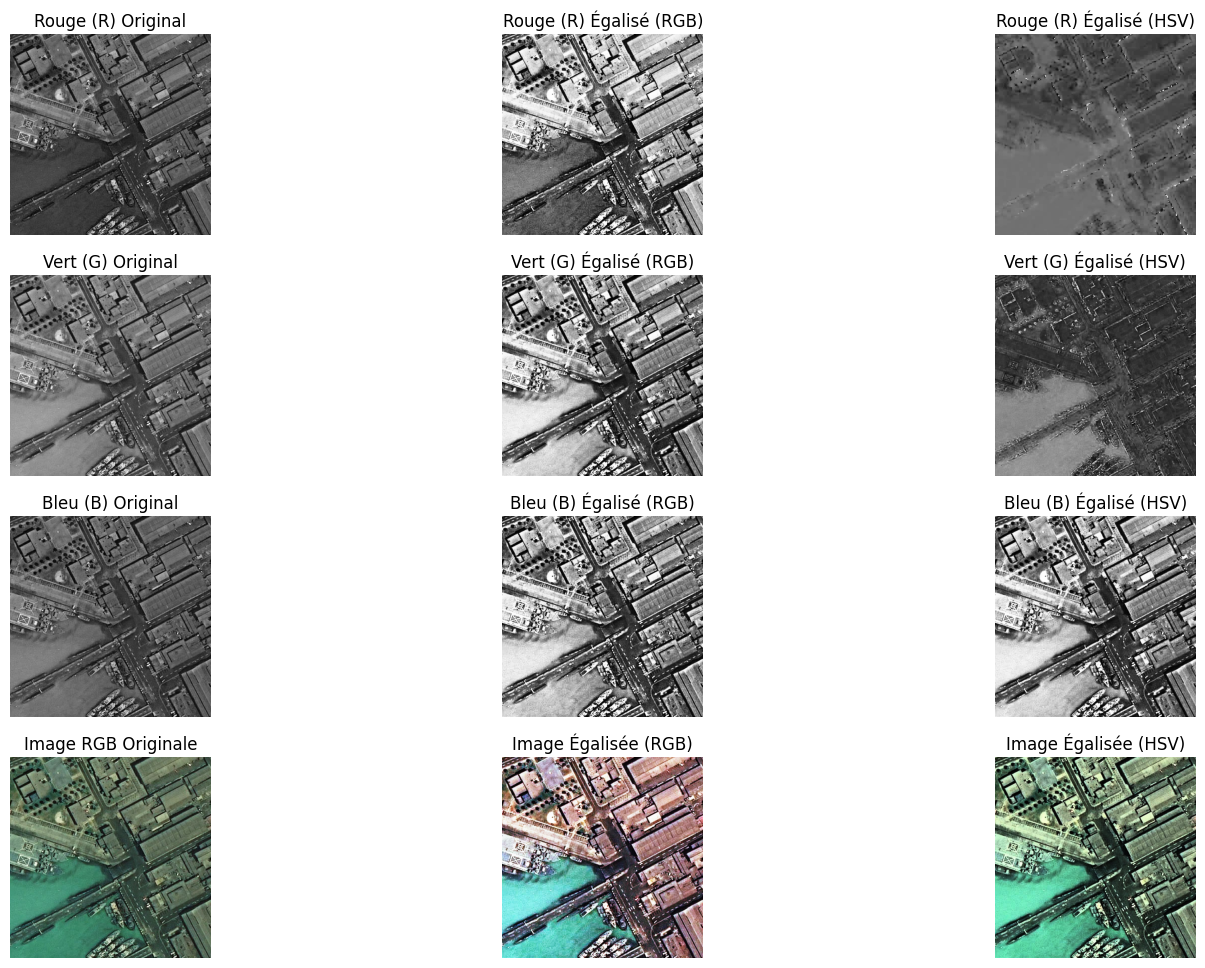

In [50]:
def egalisationHistogrammeHSV(imageName):
    # Lire l'image avec OpenCV et la convertir de RGB à BGR si nécessaire
    image = Image.open(imageName).convert("RGB")
    imageBGR = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    
    # Convertir l'image BGR en HSV
    imageHSVArray = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2HSV)

    # Sauvegarder les canaux H, S, V originaux pour comparaison
    originalChannels = [imageHSVArray[:, :, i] for i in range(3)]
    
    # Appliquer l'égalisation d'histogramme sur le canal V
    imageHSVArray[:, :, 2] = egalisationHistogrammeCanal(imageHSVArray[:, :, 2])

    # Sauvegarder les canaux égalisés en HSV
    equalizedChannelsHSV = [imageHSVArray[:, :, i] for i in range(3)]
    
    # Reconvertir de HSV à BGR puis de BGR à RGB pour l'affichage avec PIL
    imageHSVBGR = cv2.cvtColor(imageHSVArray, cv2.COLOR_HSV2BGR)
    imageHSV = Image.fromarray(cv2.cvtColor(imageHSVBGR, cv2.COLOR_BGR2RGB))

    # Enregistrer l'image résultante
    imageHSVName = "imageHSV.png"
    imageHSV.save(imageHSVName, "png")

    # Sauvegarder l'image dans un dictionnaire pour le retour avec la clé attendue
    saveImage = {"imageHSV": imageHSVName}
    return (saveImage, imageHSV, originalChannels, equalizedChannelsHSV)

def afficherComparaisonCanaux(imageOriginal, imageEqualizedRGB, originalChannelsRGB, equalizedChannelsRGB, equalizedChannelsHSV):
    plt.figure(figsize=(18, 12))

    # Affichage des canaux R, G, B : Original, Égalisé (RGB), Égalisé (HSV)
    channel_names = ['Rouge (R)', 'Vert (G)', 'Bleu (B)']
    for i in range(3):
        # Canal original
        plt.subplot(4, 3, i * 3 + 1)
        plt.imshow(originalChannelsRGB[i], cmap='gray')
        plt.title(f"{channel_names[i]} Original")
        plt.axis('off')

        # Canal égalisé en RGB
        plt.subplot(4, 3, i * 3 + 2)
        plt.imshow(equalizedChannelsRGB[i], cmap='gray')
        plt.title(f"{channel_names[i]} Égalisé (RGB)")
        plt.axis('off')

        # Canal égalisé en HSV
        plt.subplot(4, 3, i * 3 + 3)
        plt.imshow(equalizedChannelsHSV[i], cmap='gray')
        plt.title(f"{channel_names[i]} Égalisé (HSV)")
        plt.axis('off')

    # Affichage de l'image complète RGB : Originale et Égalisée (RGB et HSV)
    plt.subplot(4, 3, 10)
    plt.imshow(imageOriginal)
    plt.title("Image RGB Originale")
    plt.axis('off')

    plt.subplot(4, 3, 11)
    plt.imshow(imageEqualizedRGB)
    plt.title("Image Égalisée (RGB)")
    plt.axis('off')

    plt.subplot(4, 3, 12)
    plt.imshow(imageHSV)
    plt.title("Image Égalisée (HSV)")
    plt.axis('off')

    plt.show()

# Appel de la fonction en capturant toutes les valeurs de retour
croppedImage = Image.open(croppedImageName).convert("RGB")
croppedImageArray = np.array(croppedImage)

# Égalisation de l'image en HSV
saveImage, imageHSV, _, equalizedChannelsHSV = egalisationHistogrammeHSV(croppedImageName)

# Afficher les comparaisons
afficherComparaisonCanaux(croppedImageArray, np.array(imageEqualized), originalChannels, equalizedChannels, equalizedChannelsHSV)

#### Commentaire : 
Dans les images égalisées en HSV, certains détails deviennent plus difficiles à distinguer, notamment dans les zones sombres où le contraste semble avoir diminué. Cette diminution de visibilité dans certaines parties pourrait être due à la manière dont l'égalisation affecte la composante de luminosité sans toucher aux teintes, ce qui peut créer des zones moins détaillées.

### Calcule EQM entre l'image HSV et l'image originale

In [51]:
eqm = calculerEQM(imageHSV, croppedImage)
print(f"EQM entre l'image originale et l'image égaliser: {eqm:.2f}")

EQM entre l'image originale et l'image égaliser: 101.20


## Étape 4 : Reduction du bruit
### Question 1 : Création de quatre fonctions :
#### Filtre Lineaire :
#### 1- Filtre Gaussien

In [52]:
def FiltreGaussien(image, iterations=1):
    imageArray = np.array(image)
    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], np.float32) / 16
    for _ in range(iterations):
        filteredArray = np.zeros_like(imageArray)
        for i in range(1, imageArray.shape[0] - 1):
            for j in range(1, imageArray.shape[1] - 1):
                region = imageArray[i-1:i+2, j-1:j+2]
                filteredArray[i, j] = np.sum(region * kernel)
        imageArray = filteredArray
    return Image.fromarray(imageArray)

#### 2- Filtre Moyenneur

In [53]:
def FiltreMoyenneur(image, masque_type='uniforme'):
    imageArray = np.array(image)
    if masque_type == 'uniforme':
        kernel = np.ones((3, 3), np.float32) / 9
    elif masque_type == 'ponderé':
        kernel = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]], np.float32) / 10
    else:
        raise ValueError("masque_type doit être 'uniforme' ou 'ponderé'")
    filteredArray = np.zeros_like(imageArray)
    for i in range(1, imageArray.shape[0] - 1):
        for j in range(1, imageArray.shape[1] - 1):
            region = imageArray[i-1:i+2, j-1:j+2]
            filteredArray[i, j] = np.sum(region * kernel)
    return Image.fromarray(filteredArray)

#### Filtre non linéaire :
#### 1- Filtre Min

In [54]:
def FiltreMin(image):
    imageArray = np.array(image)
    filteredArray = np.zeros_like(imageArray)
    for i in range(1, imageArray.shape[0] - 1):
        for j in range(1, imageArray.shape[1] - 1):
            region = imageArray[i-1:i+2, j-1:j+2]
            filteredArray[i, j] = np.min(region)
    return Image.fromarray(filteredArray)

#### 2- Filtre Max

In [55]:
def FiltreMax(image):
    imageArray = np.array(image)
    filteredArray = np.zeros_like(imageArray)
    for i in range(1, imageArray.shape[0] - 1):
        for j in range(1, imageArray.shape[1] - 1):
            region = imageArray[i-1:i+2, j-1:j+2]
            filteredArray[i, j] = np.max(region)
    return Image.fromarray(filteredArray)

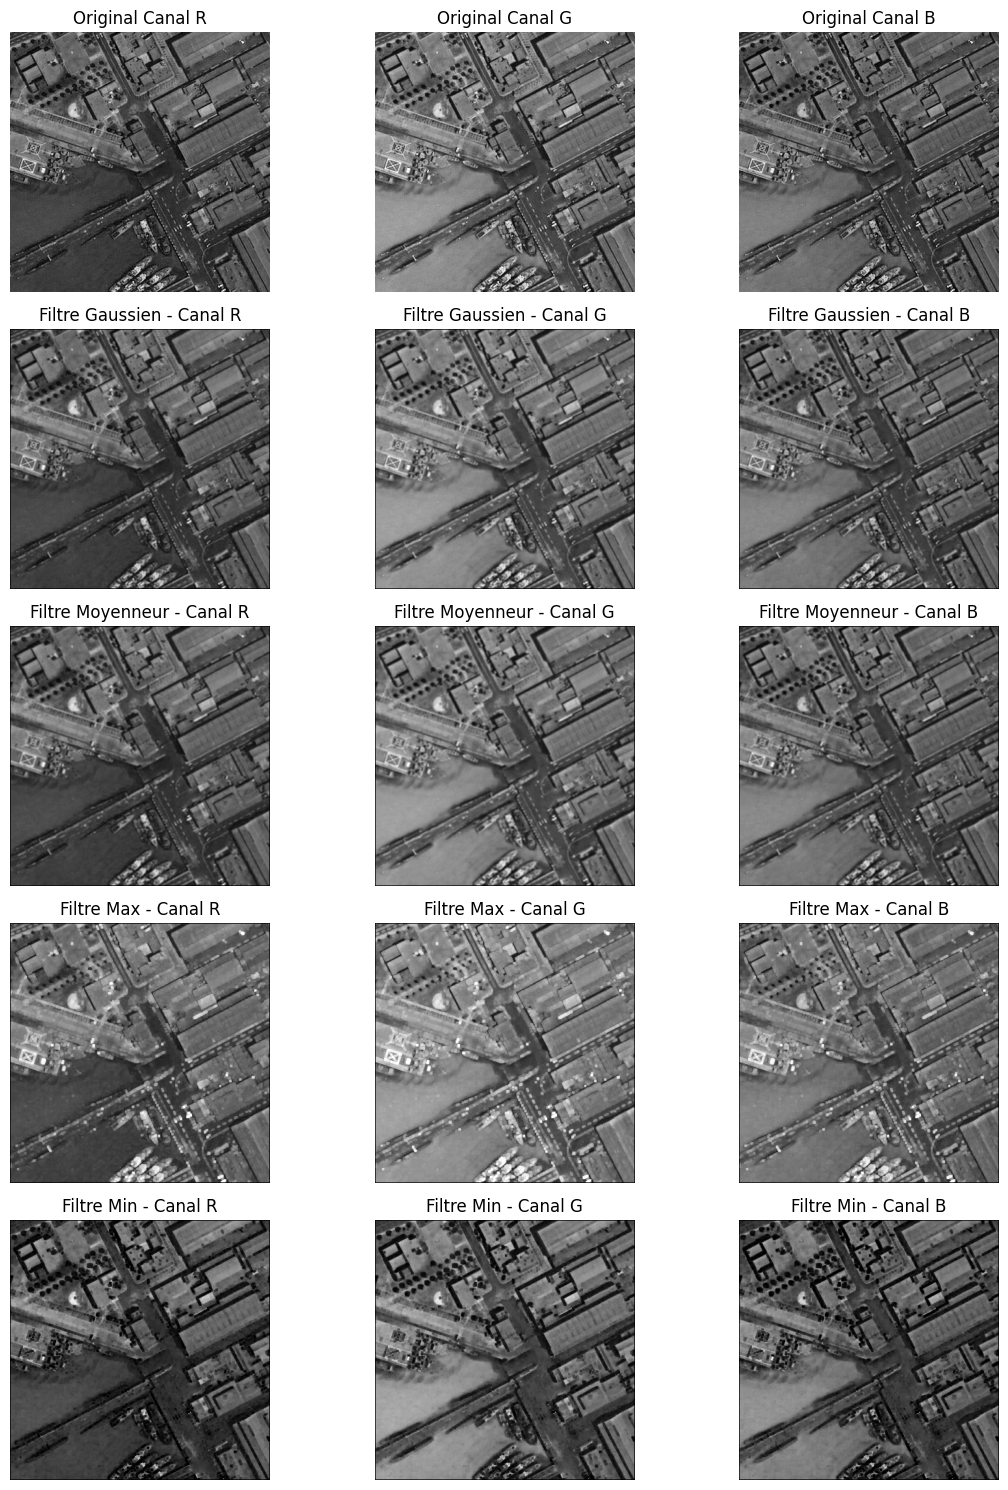

In [64]:
# Application des filtres pour chaque canal
r, g, b = croppedImage.split()
moyenneur_resultats = (FiltreMoyenneur(r), FiltreMoyenneur(g), FiltreMoyenneur(b))
gaussien_resultats = (FiltreGaussien(r), FiltreGaussien(g), FiltreGaussien(b))
max_resultats = (FiltreMax(r), FiltreMax(g), FiltreMax(b))
min_resultats = (FiltreMin(r), FiltreMin(g), FiltreMin(b))

# Affichage des résultats
canaux = ['R', 'G', 'B']
filtres = ['Gaussien', 'Moyenneur', 'Max', 'Min']
resultats = [gaussien_resultats, moyenneur_resultats, max_resultats, min_resultats]

plt.figure(figsize=(15, 15))

# Affiche l'image originale pour chaque canal
for i, canal in enumerate([r, g, b]):
    plt.subplot(5, 4, i + 1)
    plt.imshow(canal, cmap='gray')
    plt.title(f"Original Canal {canaux[i]}")
    plt.axis('off')

# Affichage des images filtrées pour chaque canal et filtre
for j, filtre_resultats in enumerate(resultats):
    for i, canal_filtré in enumerate(filtre_resultats):
        plt.subplot(5, 4, (j + 1) * 4 + i + 1)
        plt.imshow(canal_filtré, cmap='gray')
        plt.title(f"Filtre {filtres[j]} - Canal {canaux[i]}")
        plt.axis('off')

plt.tight_layout()
plt.show()



#### Commentaire :

Les différents filtres appliqués montrent des effets distincts sur les canaux R, G et B : le filtre Gaussien et le filtre Moyenneur lissent l'image en atténuant le bruit, avec le Gaussien produisant un flou plus subtil. Le filtre Max accentue les zones claires, augmentant le contraste, tandis que le filtre Min renforce les zones sombres, créant une image plus sombre. Chaque filtre offre un traitement unique des détails et des contrastes en fonction des besoins de l’image.

### Question 2 : Calcul du EQM entre le résultat et l'image de base

In [65]:
# Calcul et affichage de l'EQM pour chaque canal et chaque filtre
for j, filtre_resultats in enumerate(resultats):
    print()
    for i, canal_filtré in enumerate(filtre_resultats):
        eqm = calculerEQM(canal_filtré, [r, g, b][i])
        print(f"EQM entre l'image originale (Canal {canaux[i]}) et le filtre {filtres[j]} : {eqm:.2f}")



EQM entre l'image originale (Canal R) et le filtre Gaussien : 36.67
EQM entre l'image originale (Canal G) et le filtre Gaussien : 37.13
EQM entre l'image originale (Canal B) et le filtre Gaussien : 36.76

EQM entre l'image originale (Canal R) et le filtre Moyenneur : 45.00
EQM entre l'image originale (Canal G) et le filtre Moyenneur : 45.38
EQM entre l'image originale (Canal B) et le filtre Moyenneur : 45.15

EQM entre l'image originale (Canal R) et le filtre Max : 81.00
EQM entre l'image originale (Canal G) et le filtre Max : 82.17
EQM entre l'image originale (Canal B) et le filtre Max : 82.01

EQM entre l'image originale (Canal R) et le filtre Min : 80.60
EQM entre l'image originale (Canal G) et le filtre Min : 81.91
EQM entre l'image originale (Canal B) et le filtre Min : 81.24


#### Commentaire :
Les résultats d'EQM montrent que les filtres Max et Min produisent les plus grandes différences par rapport à l'image originale, en accentuant respectivement les zones claires et sombres. Les filtres Gaussien et Moyenneur introduisent un lissage modéré, avec le Moyenneur ayant un effet plus marqué que le Gaussien.